## Visualize COVID-19

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [11]:
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [12]:
df['Total Cases']= df[['Confirmed','Recovered','Deaths']].sum(axis=1) 
df.head()


,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [14]:
#worldwide cases
worldwide_df=df.groupby(['Date']).sum()
worldwide_df.head()


,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,555,28,17,600
2020-01-23,654,30,18,702
2020-01-24,941,36,26,1003
2020-01-25,1434,39,42,1515
2020-01-26,2118,52,56,2226


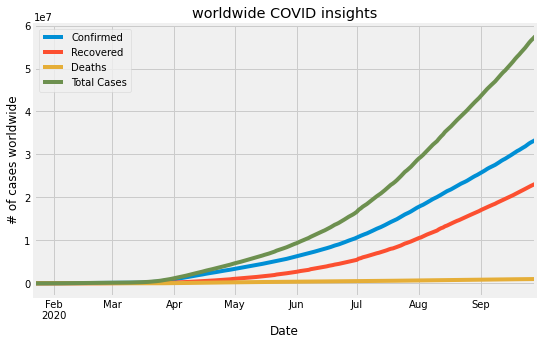

In [17]:
w=worldwide_df.plot(figsize=(8,5))
w.set_xlabel('Date')
w.set_ylabel('# of cases worldwide')
w.title.set_text('worldwide COVID insights')

plt.show()


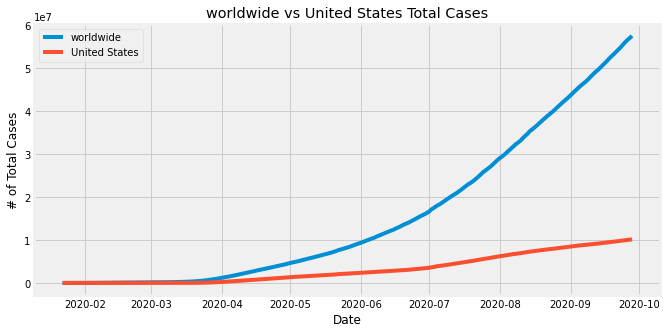

In [20]:
#trendline: US vs worldwide cases

us_df=df[df['Country']=='US'].groupby(['Date']).sum()
fig= plt.figure(figsize=(10,5))
ax= fig.add_subplot(111)

ax.plot(worldwide_df['Total Cases'], label='worldwide')
ax.plot(us_df['Total Cases'], label='United States')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('worldwide vs United States Total Cases')

plt.legend(loc='upper left')
plt.show()


In [23]:
#trendline: US daily cases and deaths

us_df=us_df.reset_index()
us_df['Daily Confirmed'] = us_df['Confirmed'] .sub(us_df['Confirmed'].shift())
us_df


,level_0,index,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed
0,0,0,2020-01-22,1,0,0,1,NaN
1,1,1,2020-01-23,1,0,0,1,0.0
2,2,2,2020-01-24,2,0,0,2,1.0
3,3,3,2020-01-25,2,0,0,2,0.0
4,4,4,2020-01-26,5,0,0,5,3.0
...,...,...,...,...,...,...,...,...
246,246,246,2020-09-24,6977658,2710183,202798,9890639,44110.0
247,247,247,2020-09-25,7032712,2727335,203750,9963797,55054.0
248,248,248,2020-09-26,7078089,2750459,204490,10033038,45377.0
249,249,249,2020-09-27,7115008,2766280,204756,10086044,36919.0


In [25]:
us_df['Daily Deaths'] = us_df['Deaths'] .sub(us_df['Deaths'].shift())
us_df


,level_0,index,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,0,0,2020-01-22,1,0,0,1,NaN,NaN
1,1,1,2020-01-23,1,0,0,1,0.0,0.0
2,2,2,2020-01-24,2,0,0,2,1.0,0.0
3,3,3,2020-01-25,2,0,0,2,0.0,0.0
4,4,4,2020-01-26,5,0,0,5,3.0,0.0
...,...,...,...,...,...,...,...,...,...
246,246,246,2020-09-24,6977658,2710183,202798,9890639,44110.0,914.0
247,247,247,2020-09-25,7032712,2727335,203750,9963797,55054.0,952.0
248,248,248,2020-09-26,7078089,2750459,204490,10033038,45377.0,740.0
249,249,249,2020-09-27,7115008,2766280,204756,10086044,36919.0,266.0


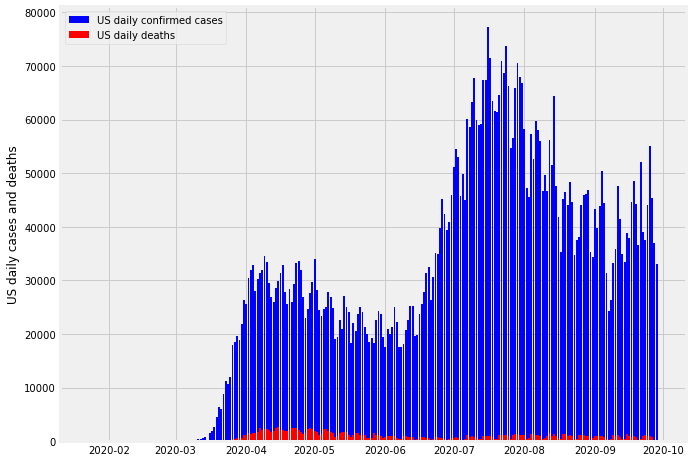

In [32]:
#x value-Date, y value-Daily Confirmed

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'],color='b',label='US daily confirmed cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'],color='r',label='US daily deaths')

ax.set_ylabel('Date')
ax.set_ylabel('# of people affected')
ax.set_ylabel('US daily cases and deaths')
plt.legend(loc='upper left')
plt.show()


In [46]:
#worst hit countries by COVID-19

from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')


'2020-09-28'

C:\Users\Hoi Yee\.conda\envs\mytensorflow\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  if __name__ == '__main__':


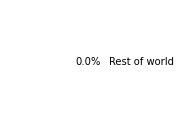

In [58]:
today_df= df[df['Date']==yesterday]
top_10= today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world']=today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world','Country']='Rest of world'

fig=plt.figure(figsize=(2,2))
ax=fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'],autopct='%1.1f%%')
plt.show()